<a href="https://colab.research.google.com/github/sahasrakalahasthi/Student_Report_Analysis-using-Python-Data-Analysis/blob/main/Student_Result_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Students_result_data/Original_data_with_more_rows.csv")

To print data -> *print()*

In [5]:
print(df)

       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female     group B   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         995    male     group C    some high school      standard   
30637         996    male     group E  associate's degree  free/reduced   
30638         997    male     group C        some college      standard   
30639         998    male     group A    some high school  free/reduced   
30640         999  female     group D  associate's degree      standard   

        TestPrep  MathScore  ReadingScore  WritingScore  
0           none         72            72

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [7]:
df.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [12]:
df.isnull().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

To delete a column -> *drop("columnname",axis=)*

In [13]:
df=df.drop("Unnamed: 0",axis=1)

In [14]:
print(df)

       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group B   bachelor's degree      standard       none   
1      female     group C        some college      standard  completed   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636    male     group C    some high school      standard       none   
30637    male     group E  associate's degree  free/reduced       none   
30638    male     group C        some college      standard       none   
30639    male     group A    some high school  free/reduced  completed   
30640  female     group D  associate's degree      standard       none   

       MathScore  ReadingScore  WritingScore  
0             72            72            74  
1             69 

To print starting 5 rows -> *.head()*

In [15]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType   TestPrep  MathScore  \
0  female     group B   bachelor's degree      standard       none         72   
1  female     group C        some college      standard  completed         69   
2  female     group B     master's degree      standard       none         90   
3    male     group A  associate's degree  free/reduced       none         47   
4    male     group C        some college      standard       none         76   

   ReadingScore  WritingScore  
0            72            74  
1            90            88  
2            95            93  
3            57            44  
4            78            75  


In [17]:
df["TestPrep"]=df["TestPrep"].str.replace("none","started")
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType   TestPrep  MathScore  \
0  female     group B   bachelor's degree      standard    started         72   
1  female     group C        some college      standard  completed         69   
2  female     group B     master's degree      standard    started         90   
3    male     group A  associate's degree  free/reduced    started         47   
4    male     group C        some college      standard    started         76   

   ReadingScore  WritingScore  
0            72            74  
1            90            88  
2            95            93  
3            57            44  
4            78            75  


gender distribution


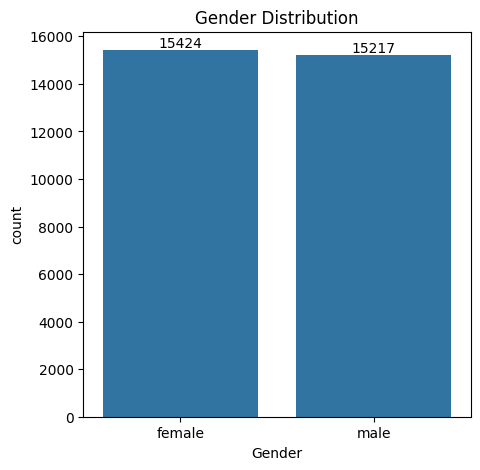

In [38]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [ ]:
#from the above the chart no.of females more than no.of males

In [24]:
gb=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.527787     71.368350     70.374619
bachelor's degree   70.635000     73.375556     73.423611
high school         64.670038     67.522467     65.565909
master's degree     72.168137     75.202044     75.246168
some college        66.603434     69.528093     68.653661
some high school    62.926359     65.826816     63.815473


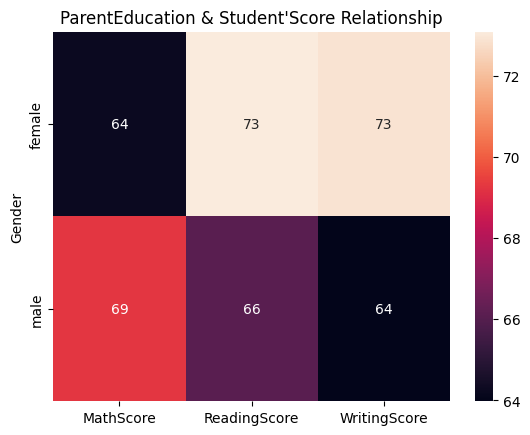

In [40]:
sns.heatmap(gb,annot=True)
plt.title("ParentEducation & Student'Score Relationship")
plt.show()

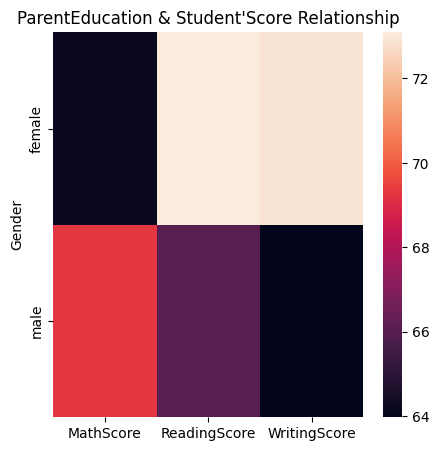

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(gb)
plt.title("ParentEducation & Student'Score Relationship")
plt.show()

In [34]:
print(df)

       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group B   bachelor's degree      standard    started   
1      female     group C        some college      standard  completed   
2      female     group B     master's degree      standard    started   
3        male     group A  associate's degree  free/reduced    started   
4        male     group C        some college      standard    started   
...       ...         ...                 ...           ...        ...   
30636    male     group C    some high school      standard    started   
30637    male     group E  associate's degree  free/reduced    started   
30638    male     group C        some college      standard    started   
30639    male     group A    some high school  free/reduced  completed   
30640  female     group D  associate's degree      standard    started   

       MathScore  ReadingScore  WritingScore  
0             72            72            74  
1             69 

In [35]:
gb=df.groupby("Gender").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.262902     73.093815     72.897692
male    69.269633     66.108957     63.978708


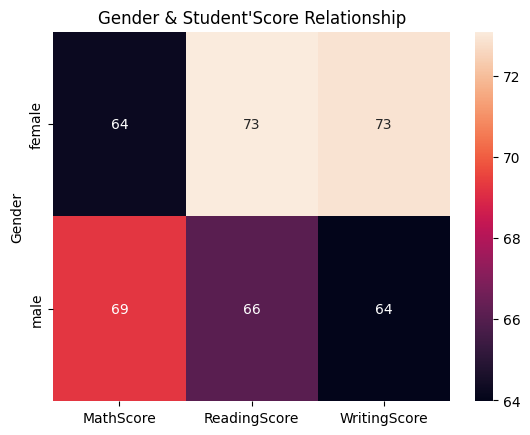

In [42]:
sns.heatmap(gb,annot=True)
plt.title("Gender & Student'Score Relationship")
plt.show()

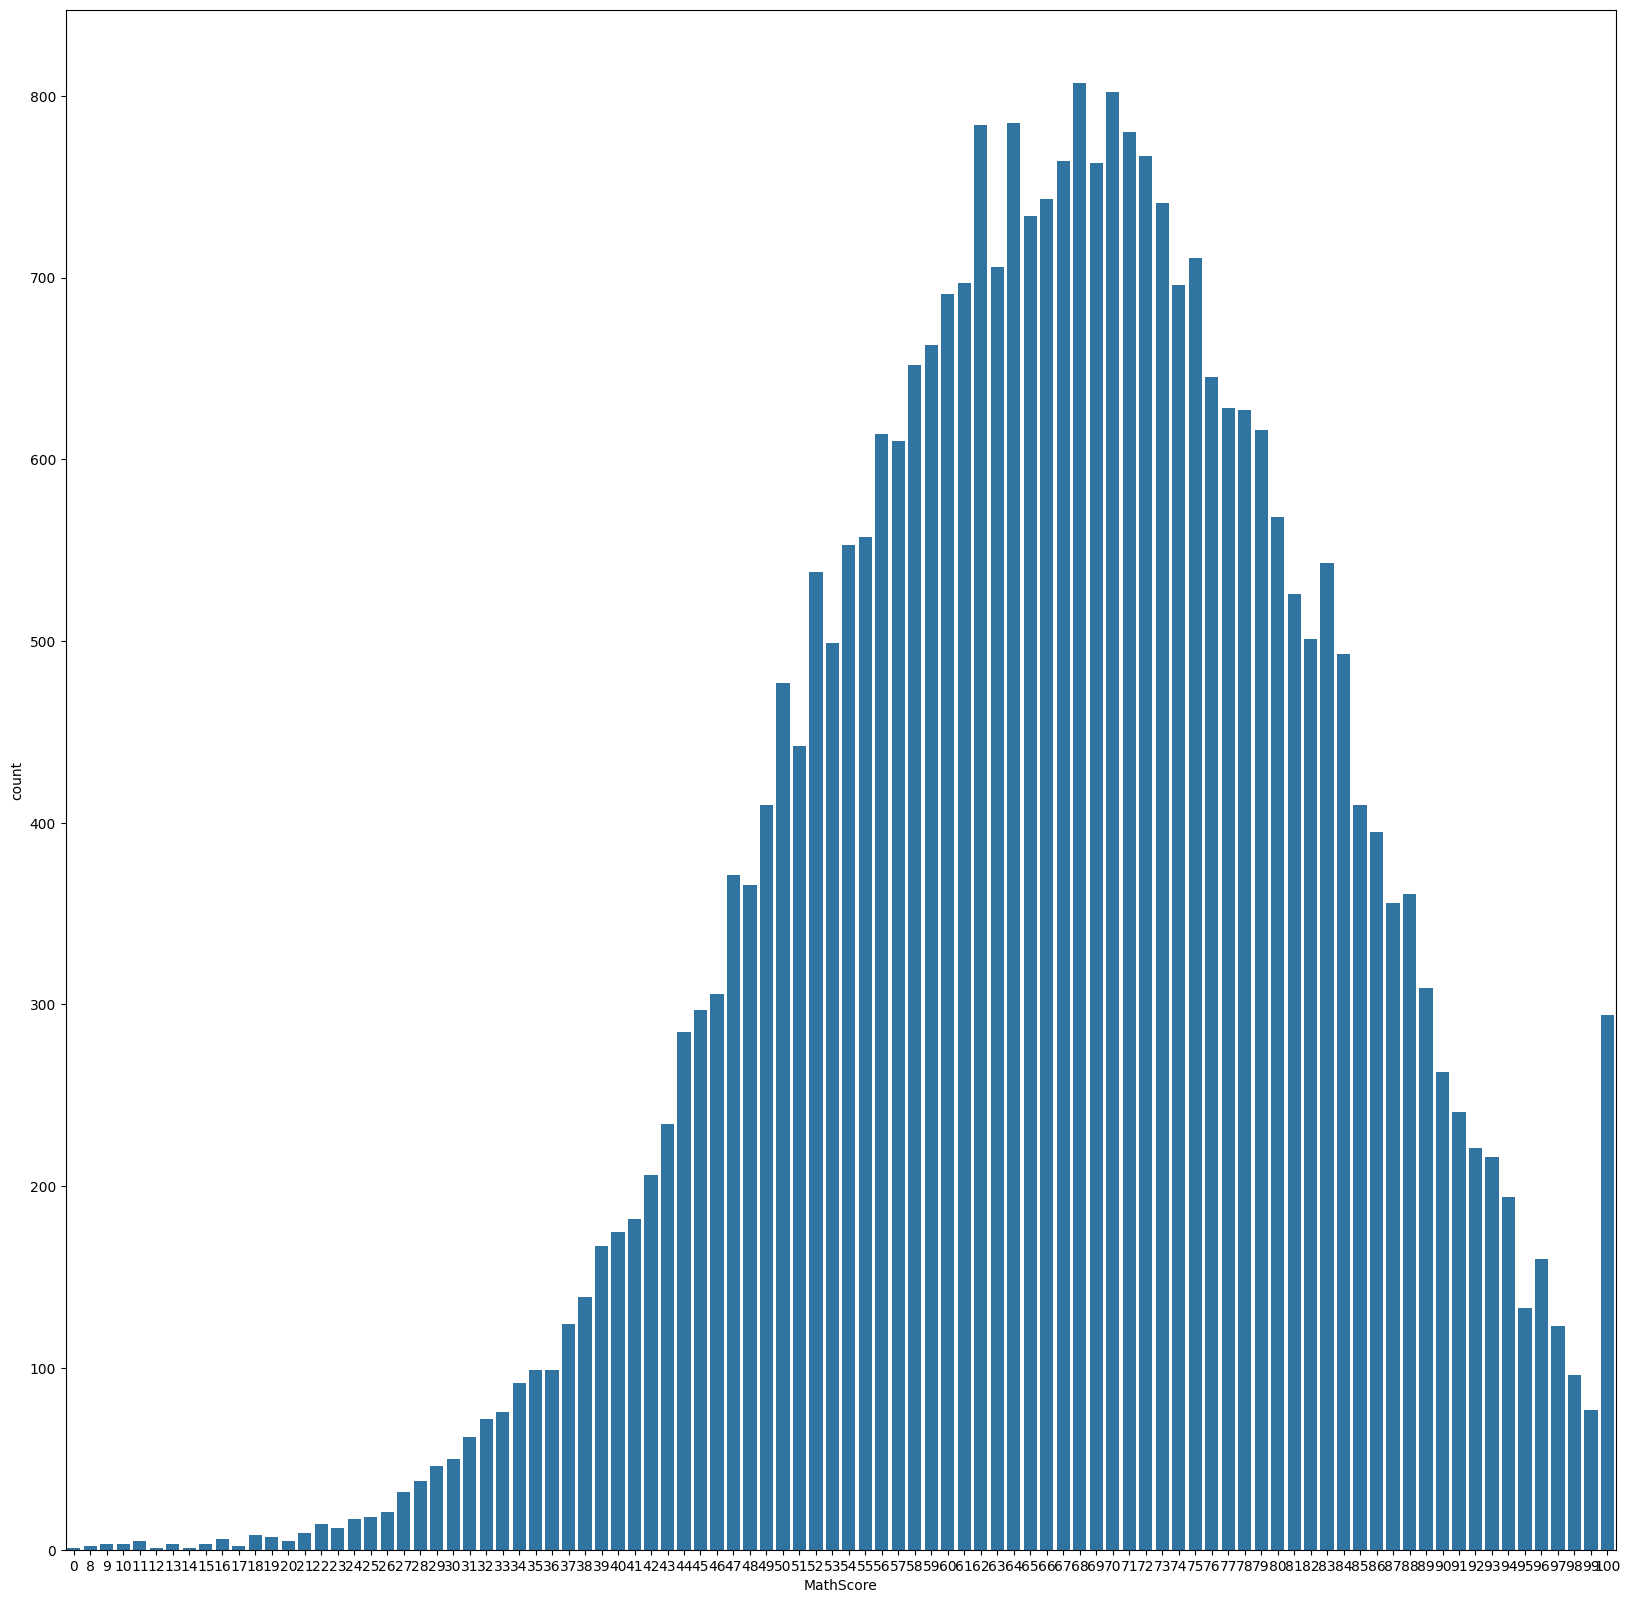

In [47]:
plt.figure(figsize=(20,20))
sns.countplot(data=df,x="MathScore")
plt.show()

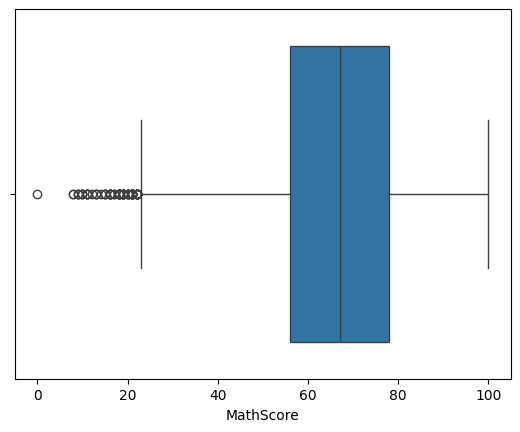

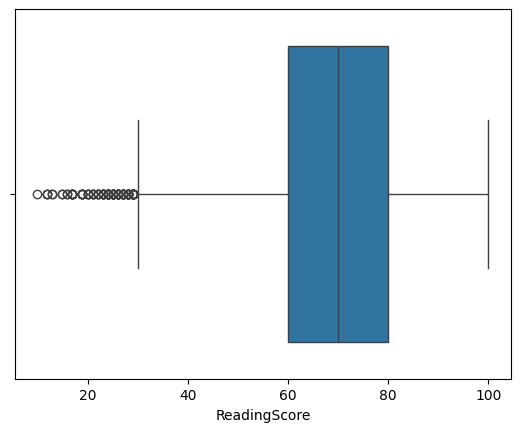

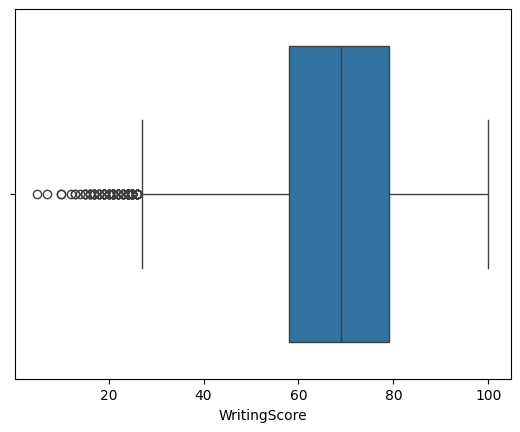

In [50]:
sns.boxplot(data=df,x="MathScore")
plt.show()
sns.boxplot(data=df,x="ReadingScore")
plt.show()
sns.boxplot(data=df,x="WritingScore")
plt.show()

In [51]:
print(df)

       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group B   bachelor's degree      standard    started   
1      female     group C        some college      standard  completed   
2      female     group B     master's degree      standard    started   
3        male     group A  associate's degree  free/reduced    started   
4        male     group C        some college      standard    started   
...       ...         ...                 ...           ...        ...   
30636    male     group C    some high school      standard    started   
30637    male     group E  associate's degree  free/reduced    started   
30638    male     group C        some college      standard    started   
30639    male     group A    some high school  free/reduced  completed   
30640  female     group D  associate's degree      standard    started   

       MathScore  ReadingScore  WritingScore  
0             72            72            74  
1             69 

In [54]:
print(df["EthnicGroup"].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


In [ ]:
sns.countplot(data=df,x="EthnicGroup")
plt.show()

In [64]:
groupA=df.loc[(df['EthnicGroup']=='group A')].count()
print(groupA)
groupB=df.loc[(df['EthnicGroup']=='group B')].count()
print(groupB)
groupC=df.loc[(df['EthnicGroup']=='group C')].count()
print(groupC)
groupD=df.loc[(df['EthnicGroup']=='group D')].count()
print(groupD)

Gender          2359
EthnicGroup     2359
ParentEduc      2359
LunchType       2359
TestPrep        2359
MathScore       2359
ReadingScore    2359
WritingScore    2359
dtype: int64
Gender          6192
EthnicGroup     6192
ParentEduc      6192
LunchType       6192
TestPrep        6192
MathScore       6192
ReadingScore    6192
WritingScore    6192
dtype: int64
Gender          9816
EthnicGroup     9816
ParentEduc      9816
LunchType       9816
TestPrep        9816
MathScore       9816
ReadingScore    9816
WritingScore    9816
dtype: int64
Gender          7986
EthnicGroup     7986
ParentEduc      7986
LunchType       7986
TestPrep        7986
MathScore       7986
ReadingScore    7986
WritingScore    7986
dtype: int64


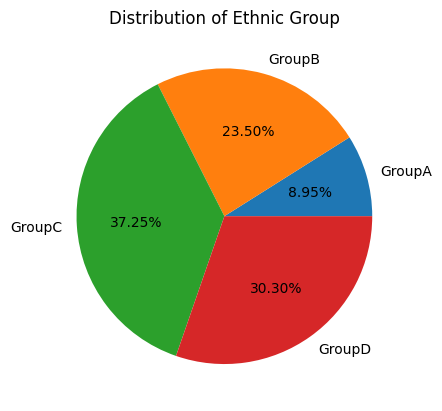

In [70]:
labels=['GroupA','GroupB','GroupC','GroupD']
mlist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup']]
plt.pie(mlist,labels=labels,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groupl")
plt.show()

[Text(0, 0, '6192'),
 Text(0, 0, '9816'),
 Text(0, 0, '2359'),
 Text(0, 0, '7986'),
 Text(0, 0, '4288')]

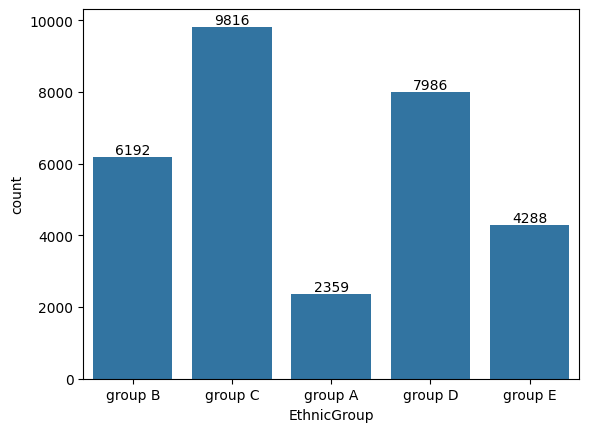

In [73]:
ax=sns.countplot(data=df,x="EthnicGroup")
ax.bar_label(ax.containers[0])